In [163]:
#Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [164]:
# importing the required

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
import scipy as sc
import math as m

In [165]:
#importing the base data relating to dataset used for case study

loan = pd.read_csv("loan.csv", low_memory = False )

# we used low_memory as false, since some columns have date and blanks 
#hence pandas may view this as multiple datatype and needa more time to process


# INSPECTING THE DATAFRAME

In [166]:
#inspect the DataFrames

loan.info()

# the dataframe has over 111 columns and 39717 rows.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [167]:
#inspect the DataFrames

loan.dtypes


# the dataframe columns and its various data types

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [168]:
#inspect the DataFrames

loan.head()


# the dataframe columns and its various data types

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [169]:
# inspecting the dataframe
loan.shape

# there are 39717 rows and 111 columns

(39717, 111)

In [170]:
# inspecting the dataframe
loan.describe()

#87 columns have values

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# DEALING WITH NULL VALUES

In [171]:
#inspecting number of columns with all items as Null Values.

loan_sum=pd.DataFrame(loan.isna().sum())

print("There are ", len(loan_sum.loc[loan_sum[0]>=39717]), "columns with Null Values, the details are below:\n")
print(loan_sum.loc[loan_sum[0]>=39717],"\n")



There are  54 columns with Null Values, the details are below:

                                    0
mths_since_last_major_derog     39717
annual_inc_joint                39717
dti_joint                       39717
verification_status_joint       39717
tot_coll_amt                    39717
tot_cur_bal                     39717
open_acc_6m                     39717
open_il_6m                      39717
open_il_12m                     39717
open_il_24m                     39717
mths_since_rcnt_il              39717
total_bal_il                    39717
il_util                         39717
open_rv_12m                     39717
open_rv_24m                     39717
max_bal_bc                      39717
all_util                        39717
total_rev_hi_lim                39717
inq_fi                          39717
total_cu_tl                     39717
inq_last_12m                    39717
acc_open_past_24mths            39717
avg_cur_bal                     39717
bc_open_to_buy          

In [172]:
# as can be seen above 54 out 111 columns have only Null values and hence have no utility and can be deleted.

In [173]:
# deleting all columns which have all items as Null

loan = loan.dropna(axis=1, how = 'all')


In [174]:
# can be seen the column next_pymnt_d almost 97% contains null, hence dropping the column

loan = loan.drop('next_pymnt_d', axis=1)

In [175]:
# inspecting the updated Dataframe

loan.info()

# after dropping NAs and hence dropped and there are remaning 56 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 56 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [176]:
# let's look at the loan_status.
loan['loan_status'] = loan['loan_status'].astype('category')
loan['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [177]:
# Let's check proportion of values where loan_status is 'Current'
100*len(loan[(loan.loan_status=='Current')])/len(loan)

2.8703074250321023

In [178]:
# The % of records with 'Current' status is very low. So we can remove these rows from our data set.
loan = loan[~(loan.loan_status=='Current')]

In [179]:
#inspecting number of columns with  Null Values.

# creating a new dataframe called loan_sum and computiting % of null values as compared to total rows (39717) 

loan_sum=pd.DataFrame(loan.isna().sum()/39717*100)

# sorting the new dataframe by descending order
loan_sum = loan_sum.sort_values(by = ([0]), ascending = False)

# listing all columns with null values and filering out any column without null values

print("Number of Columns with one or more Null Values",len(loan_sum.loc[loan_sum[0]!=0]),"details are below:\n")
print(loan_sum.loc[loan_sum[0]!=0])




Number of Columns with one or more Null Values 13 details are below:

                                    0
mths_since_last_record      90.230884
mths_since_last_delinq      62.706146
desc                        31.540650
emp_title                    6.007503
emp_length                   2.600901
pub_rec_bankruptcies         1.754916
last_pymnt_d                 0.178765
chargeoff_within_12_mths     0.140998
collections_12_mths_ex_med   0.140998
revol_util                   0.125891
tax_liens                    0.098195
title                        0.027696
last_credit_pull_d           0.005036


In [180]:
# No further changes are being done for values with NA, 
# we will further decide on deleting them or imputing as we analyse each column further.

# UNIVARIATE and BIVARIATE ANALYSIS

In [181]:
# Since business problem related to analysis of bad loans. Let us analyse loan status


loan['loan_status'].describe()

count          38577
unique             2
top       Fully Paid
freq           32950
Name: loan_status, dtype: object

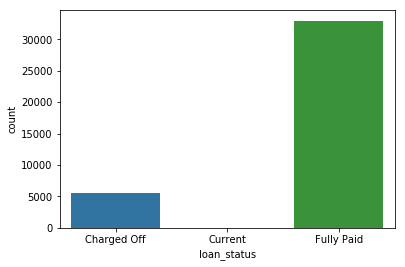

In [182]:

sns.countplot(loan['loan_status'])

# can be seen in the data set most of the loans are fullypaid and about 5000 are charged off.

In [183]:
#Looking at 'id'

loan['id'].head()

# this contains A unique LC assigned ID for the loan listing.. 
# Although not useful for the purposes of current analysis but retained as unique id


0    1077501
1    1077430
2    1077175
3    1076863
5    1075269
Name: id, dtype: int64

In [184]:
#Looking at 'member_id'

loan['member_id'].head()

# this contains A unique LC assigned Id for the borrower member. 
# Not useful for the purposes of current analysis 



0    1296599
1    1314167
2    1313524
3    1277178
5    1311441
Name: member_id, dtype: int64

In [185]:
# deleting as 'id' as unique reference exists and multiple not required
loan.drop('member_id',axis=1,inplace=True)

In [186]:
#Looking at 'loan_amnt'

loan['loan_amnt'].head()

# The listed amount of the loan applied for by the borrower and if reduced the reduced loan will be reflected

loan['loan_amnt'].describe()


count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [187]:
# dataframe with charged off loans
loanchargedoff = pd.DataFrame(loan[loan['loan_status'] == "Charged Off"])

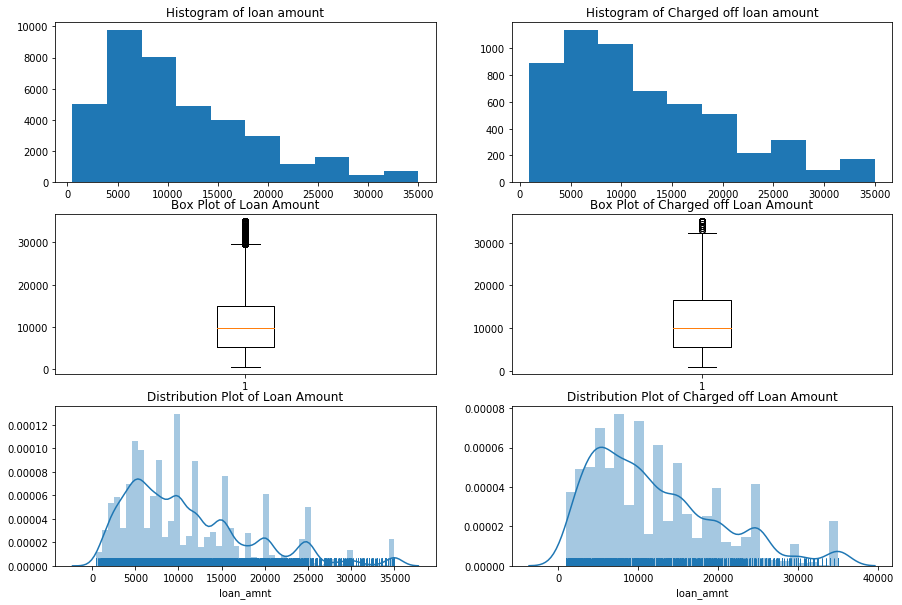

In [188]:
plt.figure(figsize=(15, 10))


# subplot 1
plt.subplot(3, 2, 1)
plt.title('Histogram of loan amount')
plt.hist(loan['loan_amnt'])

# subplot 2
plt.subplot(3, 2, 2)
plt.title('Histogram of Charged off loan amount')
plt.hist(loanchargedoff['loan_amnt'])


# subplot 3
plt.subplot(3, 2, 3)
plt.title('Box Plot of Loan Amount')
plt.boxplot(loan['loan_amnt'])

# subplot 4
plt.subplot(3, 2, 4)
plt.title('Box Plot of Charged off Loan Amount')
plt.boxplot(loanchargedoff['loan_amnt'])


# subplot 5
plt.subplot(3, 2, 5)
plt.title('Distribution Plot of Loan Amount')
sns.distplot(loan['loan_amnt'], rug = True)


# subplot 6
plt.subplot(3, 2, 6)
plt.title('Distribution Plot of Charged off Loan Amount')
sns.distplot(loanchargedoff['loan_amnt'], rug = True)


plt.show()

In [189]:
# can be seen the distribution of loan amount does not change due to status of loan

In [190]:
#Looking at 'funded_amnt' and  #Looking at 'funded_amnt_inv'


# The total amount committed to that loan at that point in time.
# The total amount committed by investors for that loan at that point in time.

print(loan.funded_amnt.describe())
print("\n")
print(loan.funded_amnt_inv.describe())

# the statistics of "funded_amnt" and "funded_amnt_inv" are very similar

count    38577.000000
mean     10784.058506
std       7090.306027
min        500.000000
25%       5200.000000
50%       9550.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


count    38577.000000
mean     10222.481123
std       7022.720644
min          0.000000
25%       5000.000000
50%       8733.440000
75%      14000.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


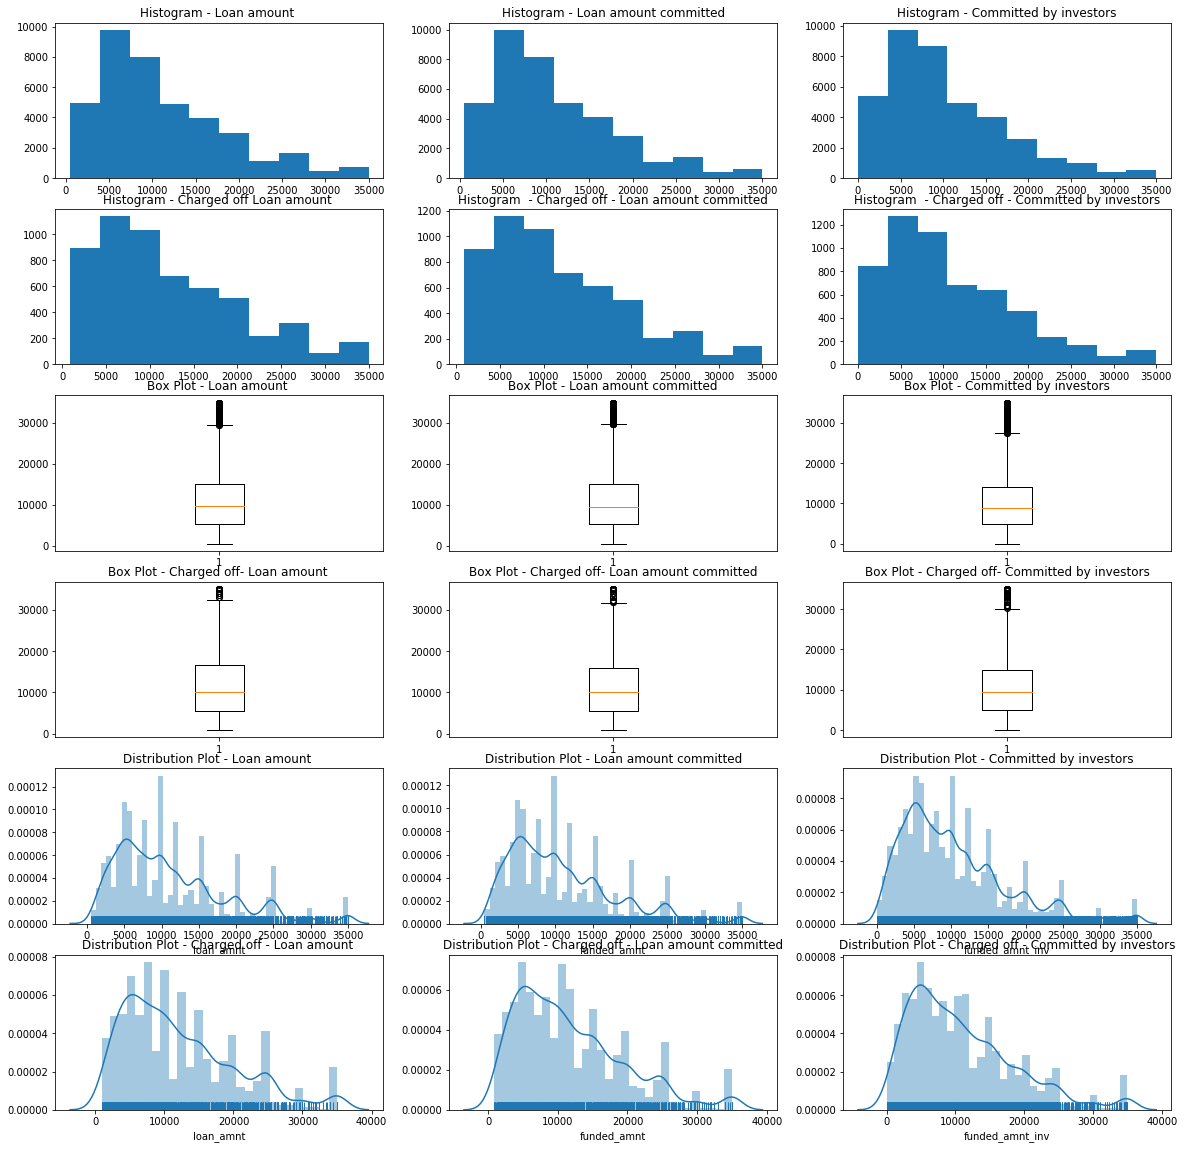

In [191]:
plt.figure(figsize=(20, 20))

# subplot 1
plt.subplot(6, 3, 1)
plt.title('Histogram - Loan amount ')
plt.hist(loan['loan_amnt'])

# subplot 2
plt.subplot(6, 3, 2)
plt.title('Histogram - Loan amount committed')
plt.hist(loan['funded_amnt'])

# subplot 3
plt.subplot(6, 3, 3)
plt.title('Histogram - Committed by investors')
plt.hist(loan['funded_amnt_inv'])



# subplot 4
plt.subplot(6, 3, 4)
plt.title('Histogram - Charged off Loan amount ')
plt.hist(loanchargedoff['loan_amnt'])

# subplot 5
plt.subplot(6, 3, 5)
plt.title('Histogram  - Charged off - Loan amount committed')
plt.hist(loanchargedoff['funded_amnt'])

# subplot 6
plt.subplot(6, 3, 6)
plt.title('Histogram  - Charged off - Committed by investors')
plt.hist(loanchargedoff['funded_amnt_inv'])


# subplot 7
plt.subplot(6, 3, 7)
plt.title('Box Plot - Loan amount ')
plt.boxplot(loan['loan_amnt'])

# subplot 8
plt.subplot(6, 3, 8)
plt.title('Box Plot - Loan amount committed')
plt.boxplot(loan['funded_amnt'])

# subplot 9
plt.subplot(6, 3, 9)
plt.title('Box Plot - Committed by investors')
plt.boxplot(loan['funded_amnt_inv'])


# subplot 10
plt.subplot(6, 3, 10)
plt.title('Box Plot - Charged off- Loan amount ')
plt.boxplot(loanchargedoff['loan_amnt'])

# subplot 11
plt.subplot(6, 3, 11)
plt.title('Box Plot - Charged off- Loan amount committed')
plt.boxplot(loanchargedoff['funded_amnt'])

# subplot 12
plt.subplot(6, 3, 12)
plt.title('Box Plot - Charged off- Committed by investors')
plt.boxplot(loanchargedoff['funded_amnt_inv'])

# subplot 13
plt.subplot(6, 3, 13)
plt.title('Distribution Plot - Loan amount ')
sns.distplot(loan['loan_amnt'], rug = True)

# subplot 14
plt.subplot(6, 3, 14)
plt.title('Distribution Plot - Loan amount committed')
sns.distplot(loan['funded_amnt'], rug = True)

# subplot 15
plt.subplot(6, 3, 15)
plt.title('Distribution Plot - Committed by investors')
sns.distplot(loan['funded_amnt_inv'], rug = True)

# subplot 16
plt.subplot(6, 3, 16)
plt.title('Distribution Plot - Charged off - Loan amount ')
sns.distplot(loanchargedoff['loan_amnt'], rug = True)

# subplot 17
plt.subplot(6, 3, 17)
plt.title('Distribution Plot - Charged off - Loan amount committed')
sns.distplot(loanchargedoff['funded_amnt'], rug = True)

# subplot 18
plt.subplot(6, 3, 18)
plt.title('Distribution Plot - Charged off - Committed by investors')
sns.distplot(loanchargedoff['funded_amnt_inv'], rug = True)

plt.show()

In [192]:
# based on the reading of the chart it can be seen "funded_amnt" and "funded_amnt_inv"  fields are very similar to
# 'loan_amnt' and given we need to analyse the business problem of bad loans, the committed loans may not be required
# hence proposing to drop "funded_amnt" and "funded_amnt_inv" 

# also there is not much difference between all loan status and only charged off

# hence propose drop 'funded_amnt' and 'funded_amnt_inv' as they have limited value for dataanalysis

In [193]:
# deleting 'funded_amnt' and 'funded_amnt_inv' as they have limited utility for assessing business problem 

loan.drop('funded_amnt',axis=1,inplace=True)
loan.drop('funded_amnt_inv',axis=1,inplace=True)


In [194]:
# inspecting term

loan.term.head()


0     36 months
1     60 months
2     36 months
3     36 months
5     36 months
Name: term, dtype: object

In [195]:
loan.term.describe()

# there seems to be two terms 36 Months and 60 Months

count          38577
unique             2
top        36 months
freq           29096
Name: term, dtype: object

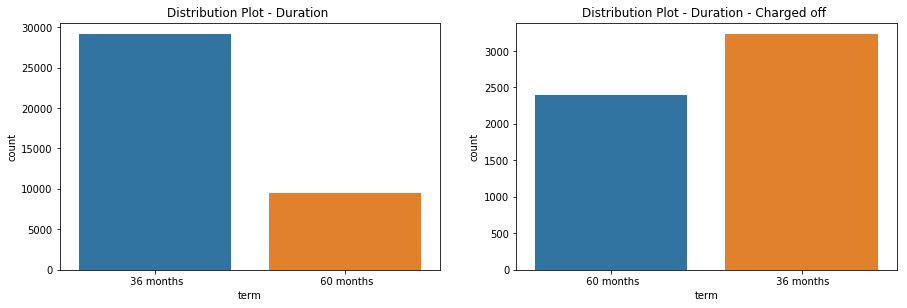

In [196]:
plt.figure(figsize=(15, 10))

# subplot 1
plt.subplot(2, 2, 1)
plt.title('Distribution Plot - Duration ')
sns.countplot(loan['term'])

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Distribution Plot - Duration - Charged off ')
sns.countplot(loanchargedoff['term'])

# can be seen from below 29096 loans have duration of 36 months and only 10,000 have 60 months duration
# also can be charegd off loans are more in 36 months category and lesser in 60 months category

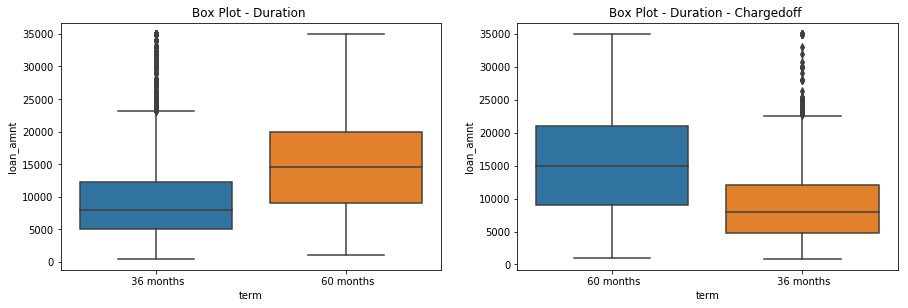

In [197]:
# trying to see relationship between duration and loan amount

plt.figure(figsize=(15, 10))

# subplot 1
plt.subplot(2, 2, 1)
plt.title('Box Plot - Duration ')
sns.boxplot(x='term', y='loan_amnt', data=loan)

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Box Plot - Duration - Chargedoff ')
sns.boxplot(x='term', y='loan_amnt', data=loanchargedoff)


# also can be seen charegd off loans are more in 36 months category and lesser in 60 months category b
# loan amount profile does not change between loan status

In [198]:
# can be seen most of 36 months loans is between $5000-$13000, there are more outliers in this term
# 60 months loan is spread between $7500 - $20,000
# above is same for charged off and all loan status

In [199]:
# analysing interest rate column

loan.int_rate.describe()

# as been below there are 371 different interest rates.

count      38577
unique       370
top       10.99%
freq         913
Name: int_rate, dtype: object

In [200]:
# analysis of various interest rate is as under:

loan['int_rate'].value_counts(dropna=False)

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
7.49%     651
9.99%     590
7.90%     574
5.42%     573
11.71%    559
11.99%    483
10.37%    467
12.69%    451
6.03%     447
8.49%     434
5.79%     410
12.99%    409
12.42%    403
10.65%    403
7.29%     397
6.62%     396
11.86%    391
8.90%     386
9.63%     378
10.59%    358
9.91%     357
5.99%     347
14.27%    344
7.14%     341
6.99%     336
         ... 
21.82%      2
17.15%      2
14.62%      2
15.83%      2
10.64%      2
17.03%      2
14.88%      2
13.84%      2
15.07%      2
15.38%      2
14.70%      2
15.01%      2
14.25%      2
14.67%      1
16.71%      1
16.96%      1
18.36%      1
16.20%      1
17.54%      1
16.01%      1
20.52%      1
24.40%      1
17.44%      1
21.48%      1
16.15%      1
17.34%      1
18.72%      1
22.64%      1
22.94%      1
17.46%      1
Name: int_rate, Length: 370, dtype: int64

In [201]:
# convert int_rate (interest rate to number)
loan.int_rate = loan.int_rate.apply(lambda x:x if pd.isnull(x) else x.split('%')[0])
loan.int_rate = loan.int_rate.astype('float')
loan.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [202]:
# updatingdataframe with charged off loans
loanchargedoff = pd.DataFrame(loan[loan['loan_status'] == "Charged Off"])

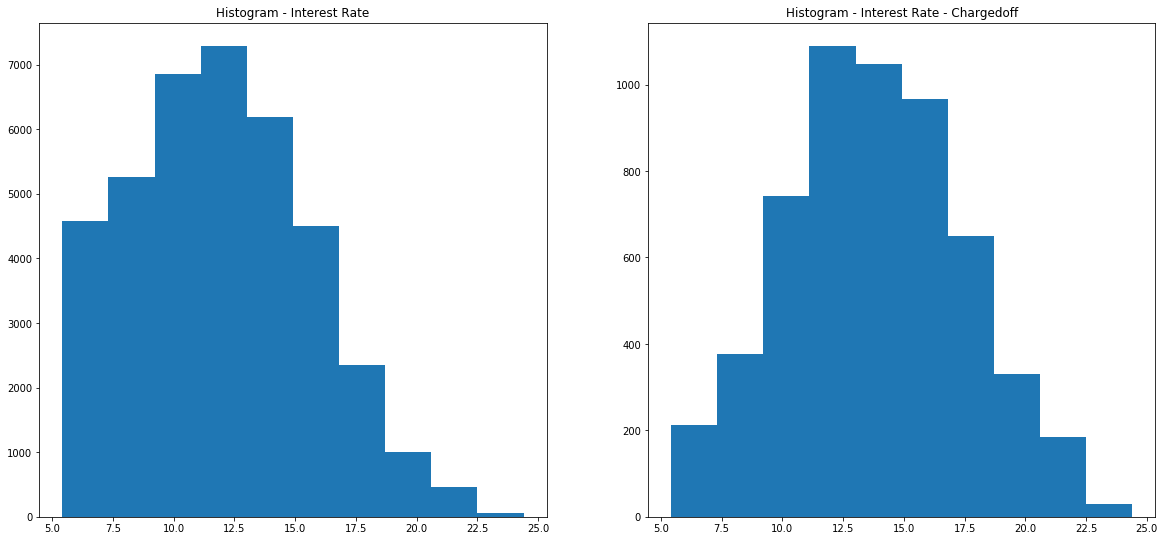

In [203]:
# using np.asarray to make histogram out of integer which is in float datatype

plt.figure(figsize=(20, 20))
# subplot 1
plt.subplot(2, 2, 1)
plt.title('Histogram - Interest Rate')
plt.hist(np.asarray(loan['int_rate'], dtype='float'))

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Histogram - Interest Rate - Chargedoff')
plt.hist(np.asarray(loanchargedoff['int_rate'], dtype='float'))



plt.show()



In [204]:
# # can be seen from the above most of the interest rates on loans are between 7.5% - 15%
# the charged off loans are higher at 11.5% - 17.5% interest

In [205]:
# analysing installment

loan.installment.describe()

# installment amount

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

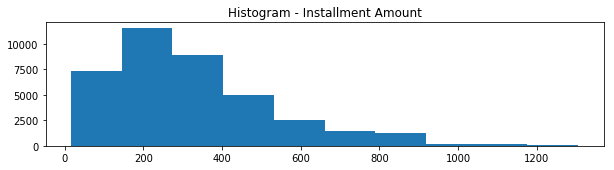

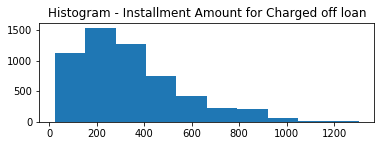

In [206]:
#histogram on installments
plt.figure(figsize=(10, 5))

# subplot 1
plt.subplot(2, 1, 1)
plt.title('Histogram - Installment Amount')
plt.hist(np.asarray(loan['installment'], dtype='float'))
plt.show()


# subplot 2
plt.subplot(2, 1, 2)
plt.title('Histogram - Installment Amount for Charged off loan')
plt.hist(np.asarray(loanchargedoff['installment'], dtype='float'))
plt.show()

# can be seen most of the installment values range around $200 
# charged off loans have an installment value around $100-$400

In [207]:
loan['grade'].describe()

# LC assigned loan grade

#since it defines grade we would like to retain this columns

count     38577
unique        7
top           B
freq      11675
Name: grade, dtype: object

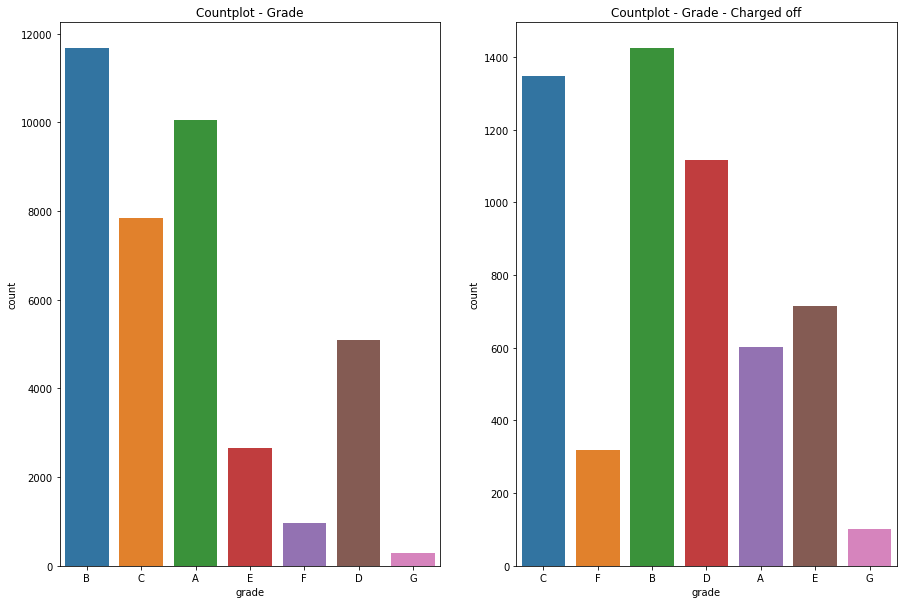

In [208]:

plt.figure(figsize=(15, 10))
# subplot 1
plt.subplot(1, 2, 1)
plt.title('Countplot - Grade')
sns.countplot(x="grade", data = loan)


# subplot 2
plt.subplot(1, 2, 2)
plt.title('Countplot - Grade - Charged off')
sns.countplot(x="grade", data = loanchargedoff)
# can be seen most of the grades are B, A and C for fully paid loans
# Charged off Loans are B, C, D

In [209]:
loan['sub_grade'].describe()

#LC assigned loan subgrade

count     38577
unique       35
top          A4
freq       2873
Name: sub_grade, dtype: object

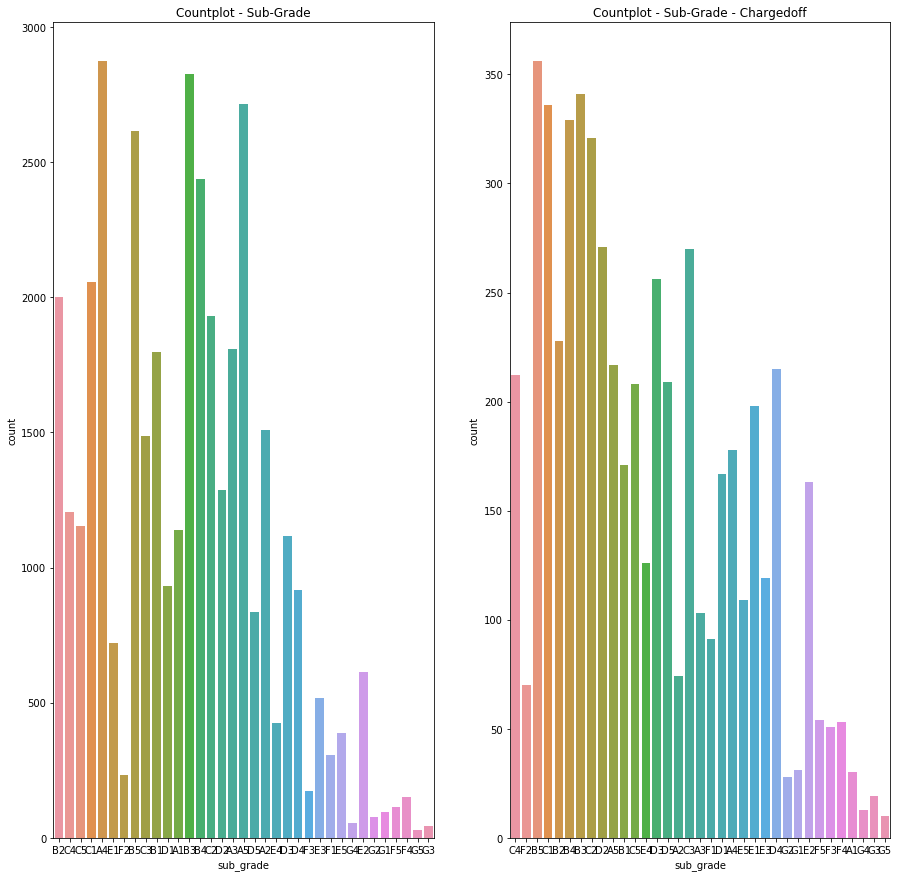

In [210]:
plt.figure(figsize=(15, 15))

# subplot 1
plt.subplot(1, 2, 1)
plt.title('Countplot - Sub-Grade')
sns.countplot(x="sub_grade", data = loan)

# subplot 2
plt.subplot(1, 2, 2)
plt.title('Countplot - Sub-Grade - Chargedoff')
sns.countplot(x="sub_grade", data = loanchargedoff)

# Highesht Charge off has occured in B5, B3, C1, B4, B3, C2

In [211]:
loan['delinq_amnt'].describe()

#The past-due amount owed for the accounts on which the borrower is now delinquent.

# All amounts are nil hence dropped as not useful for analysis

count    38577.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: delinq_amnt, dtype: float64

In [212]:
# dropping dealing amnt
loan.drop('delinq_amnt',axis=1,inplace=True)

In [213]:
loan['application_type'].describe()

#Indicates whether the loan is an individual application or a joint application with two co-borrowers

# All values are indiviual and hence not useful for analysis

count          38577
unique             1
top       INDIVIDUAL
freq           38577
Name: application_type, dtype: object

In [214]:
# dropping 'application_type'
loan.drop('application_type',axis=1,inplace=True)

In [215]:
loan['url'].describe()

#URL for the LC page with listing data.

# All values are same and not useful and hence dropped

count                                                 38577
unique                                                38577
top       https://lendingclub.com/browse/loanDetail.acti...
freq                                                      1
Name: url, dtype: object

In [216]:
# dropping 'url'
loan.drop('url',axis=1,inplace=True)

In [217]:
loan['pymnt_plan'].describe()

#Indicates if a payment plan has been put in place for the loan

# All values are same and not useful and hence dropped

count     38577
unique        1
top           n
freq      38577
Name: pymnt_plan, dtype: object

In [218]:
# dropping 'pymnt_plan'
loan.drop('pymnt_plan',axis=1,inplace=True)

In [219]:
loan['initial_list_status'].describe()

#initial_list_status

# All values are same and not useful and hence dropped

count     38577
unique        1
top           f
freq      38577
Name: initial_list_status, dtype: object

In [220]:
# dropping 'initial_list_status'
loan.drop('initial_list_status',axis=1,inplace=True)

In [221]:
loan['policy_code'].describe()

#"publicly available policy_code=1 new products not publicly available policy_code=2"

# All values are same and not useful and hence dropped

count    38577.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: policy_code, dtype: float64

In [222]:
# dropping 'policy_code'
loan.drop('policy_code',axis=1,inplace=True)

In [223]:
loan['acc_now_delinq'].describe()

#"The number of accounts on which the borrower is now delinquent.

# All values are same and not useful and hence dropped

count    38577.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: acc_now_delinq, dtype: float64

In [224]:
# dropping 'acc_now_delinq'
loan.drop('acc_now_delinq',axis=1,inplace=True)

In [225]:
loan['desc'].describe()

#Loan description provided by the borrower

# largely text and indicate purpose which can be analysed with differed column

count     26050
unique    25803
top            
freq        209
Name: desc, dtype: object

In [226]:
# dropping 'desc'
loan.drop('desc',axis=1,inplace=True)

In [227]:
loan['tax_liens'].describe()

#Number of tax liens

# All values are same and not useful and hence dropped

count    38538.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

In [228]:
# dropping 'tax_liens'
loan.drop('tax_liens',axis=1,inplace=True)

In [229]:
loan['collections_12_mths_ex_med'].describe()

#collections_12_mths_ex_med

# All values are same and not useful and hence dropped

count    38521.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

In [230]:
# dropping 'collections_12_mths_ex_med'
loan.drop('collections_12_mths_ex_med',axis=1,inplace=True)

In [231]:
loan['chargeoff_within_12_mths'].describe()

#Number of charge-offs within 12 months

# All values are same and not useful and hence dropped

count    38521.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [232]:
# dropping 'chargeoff_within_12_mths'
loan.drop('chargeoff_within_12_mths',axis=1,inplace=True)

In [233]:

#collection_recovery_fee

#post charge off collection fee

loan.collection_recovery_fee.describe()

#Since represents fee for collecting charged off fee not useful to analyse the business problem


count    38577.000000
mean        12.772728
std        150.836853
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       7002.190000
Name: collection_recovery_fee, dtype: float64

In [234]:
# dropping 'collection_recovery_fee'
loan.drop('collection_recovery_fee',axis=1,inplace=True)

In [235]:
loan['mths_since_last_record'].describe()

#Number of charge-offs within 12 months

# only 2786 have values most of which is Null. Hence dropping

count    2740.000000
mean       69.260949
std        43.987761
min         0.000000
25%        19.750000
50%        90.000000
75%       104.000000
max       129.000000
Name: mths_since_last_record, dtype: float64

In [236]:
# dropping 'mths_since_last_record'
loan.drop('mths_since_last_record',axis=1,inplace=True)

In [237]:
loan['mths_since_last_delinq'].describe()

#Number of charge-offs within 12 months

# only 14035 have values most of which is Null. Hence dropping

count    13672.000000
mean        35.882534
std         22.028093
min          0.000000
25%         18.000000
50%         34.000000
75%         52.000000
max        120.000000
Name: mths_since_last_delinq, dtype: float64

In [238]:
# dropping 'mths_since_last_delinq'
loan.drop('mths_since_last_delinq',axis=1,inplace=True)

In [239]:
# updatingdataframe with charged off loans
loanchargedoff = pd.DataFrame(loan[loan['loan_status'] == "Charged Off"])

In [240]:
# Analysing Home Ownership

#The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

loan['home_ownership'].value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

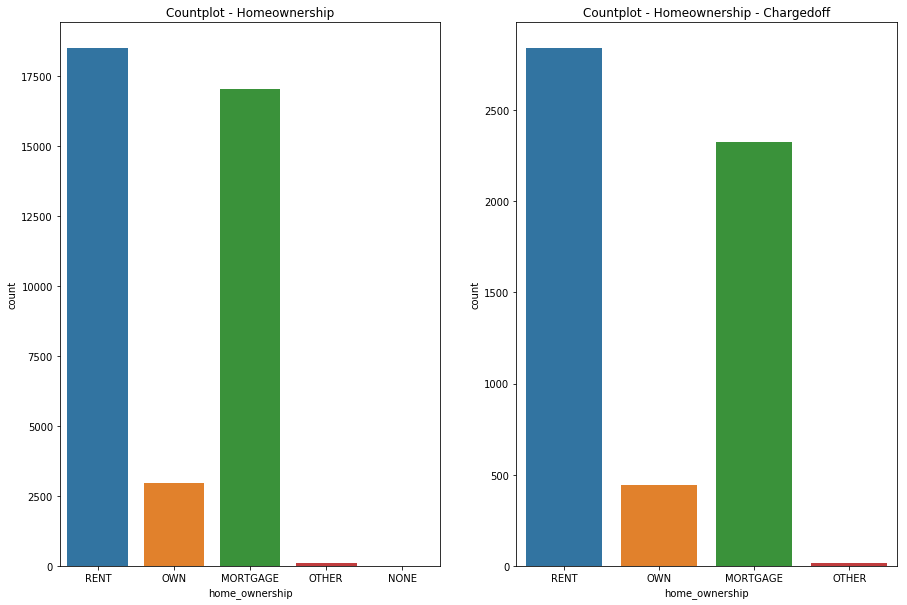

In [241]:


plt.figure(figsize=(15, 10))

# subplot 1
plt.subplot(1, 2, 1)
plt.title('Countplot - Homeownership')
sns.countplot(x="home_ownership", data = loan)

# subplot 2
plt.subplot(1, 2, 2)
plt.title('Countplot - Homeownership - Chargedoff')
sns.countplot(x="home_ownership", data = loanchargedoff)

# Charge off has happened where people have mortage and rent homes

In [242]:
# charge off is much higher in rental and followed by mortage loans

In [243]:
# Employee Title

#The job title supplied by the Borrower when applying for the loan.*
loan['emp_title'].value_counts()

US Army                                131
Bank of America                        107
IBM                                     65
AT&T                                    57
Kaiser Permanente                       56
Wells Fargo                             52
UPS                                     52
USAF                                    52
US Air Force                            51
Walmart                                 45
United States Air Force                 42
Lockheed Martin                         42
Verizon Wireless                        40
U.S. Army                               40
Self Employed                           40
USPS                                    39
US ARMY                                 38
State of California                     37
Walgreens                               37
Department of Defense                   35
Self                                    35
JP Morgan Chase                         35
Target                                  35
JPMorgan Ch

In [244]:
# Employee Title

#The job title supplied by the Borrower when applying for the loan.*
loanchargedoff['emp_title'].value_counts()

Bank of America                    20
US Army                            18
Walmart                            14
AT&T                               12
UPS                                12
IBM                                 9
U.S. Army                           8
Kaiser Permanente                   8
USPS                                7
Target                              7
US Postal Service                   7
Home Depot                          6
US Air Force                        6
JP Morgan Chase                     6
American Airlines                   6
Northrop Grumman                    6
verizon wireless                    6
United States Marine Corps          5
US Bank                             5
walgreens                           5
us army                             5
US ARMY                             5
Comcast                             5
Self Employed                       5
Sprint                              5
United States Air Force             5
ups         

In [245]:
# the top employees taking loans and those not repaying are similar. Hence this column is not analysed further

In [246]:
# Employee Length

#Employment length in years. 
#Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
loan['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

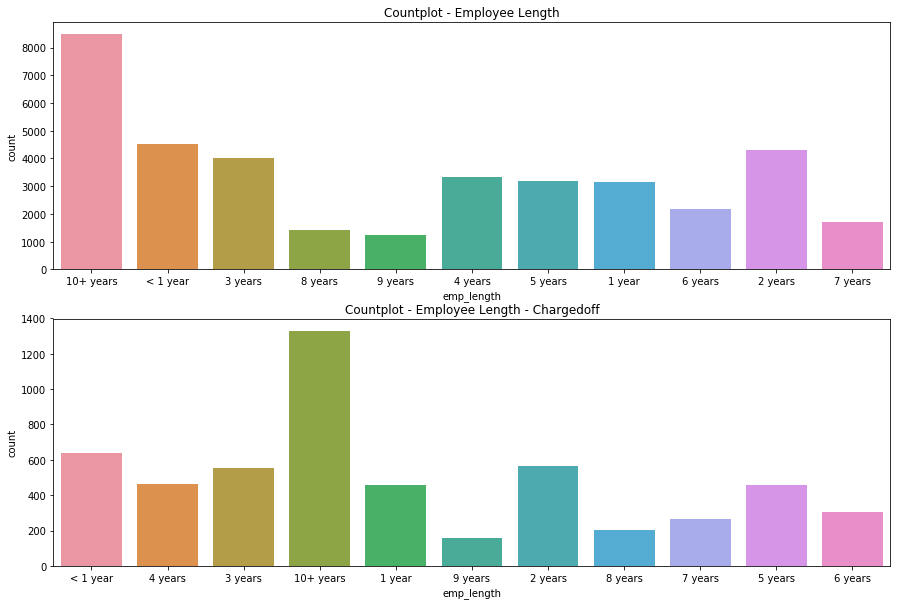

In [247]:
# Analysis of Employee Length

plt.figure(figsize=(15, 10))

# subplot 1
plt.subplot(2, 1, 1)
plt.title('Countplot - Employee Length')
sns.countplot(x="emp_length", data = loan)

# subplot 2
plt.subplot(2, 1, 2)
plt.title('Countplot - Employee Length - Chargedoff')
sns.countplot(x="emp_length", data = loanchargedoff)

# Charge off for 10+ years of experience

In [248]:
# annual income

loan.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [249]:
#bucketing annual income
# annual income

#loan.annual_inc = loan.annual_inc.astype('int')

def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

loan['annual_inc_bucket'] = loan['annual_inc'].apply(lambda x: annual_income(x))
loanchargedoff['annual_inc_bucket'] = loanchargedoff['annual_inc'].apply(lambda x: annual_income(x))



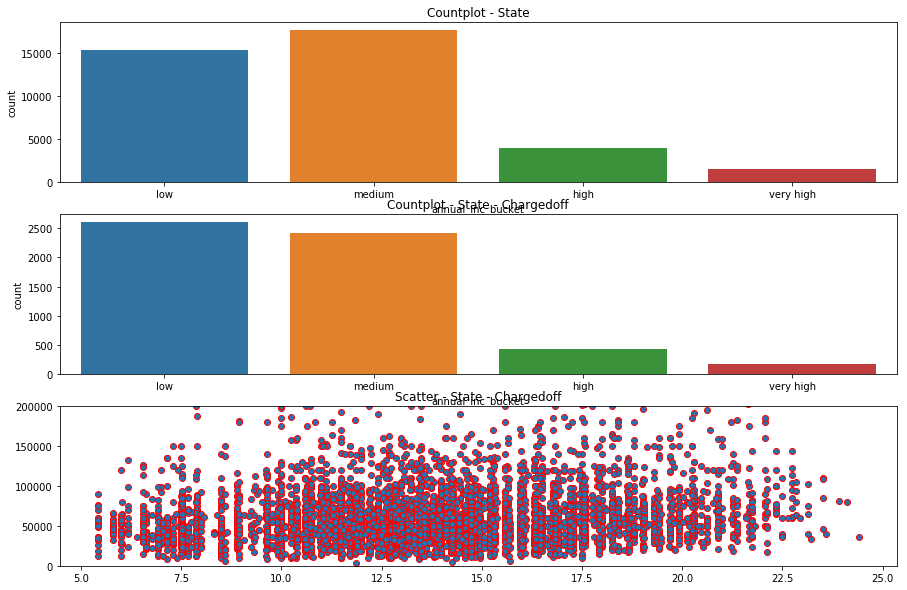

In [250]:
plt.figure(figsize=(15, 10))

# subplot 1
plt.subplot(3, 1, 1)
plt.title('Countplot - State')
sns.countplot(x="annual_inc_bucket", data = loan)

# subplot 2
plt.subplot(3, 1, 2)
plt.title('Countplot - State - Chargedoff')
sns.countplot(x="annual_inc_bucket", data = loanchargedoff)

# subplot 3
plt.subplot(3, 1, 3)
plt.title('Scatter - State - Chargedoff')
plt.ylim(0,200000)
plt.scatter(x='int_rate',y="annual_inc", data = loanchargedoff,edgecolors='r')

# maximum charge off are from low income group and closely behind is medium income group
# % charge off from High and very high is very high as compared to loan given
# there is no positive correlation between Annual Income and Intere

In [251]:
#addr_state

# The state provided by the borrower in the loan application

loan['addr_state'].value_counts()

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
HI     166
NH     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

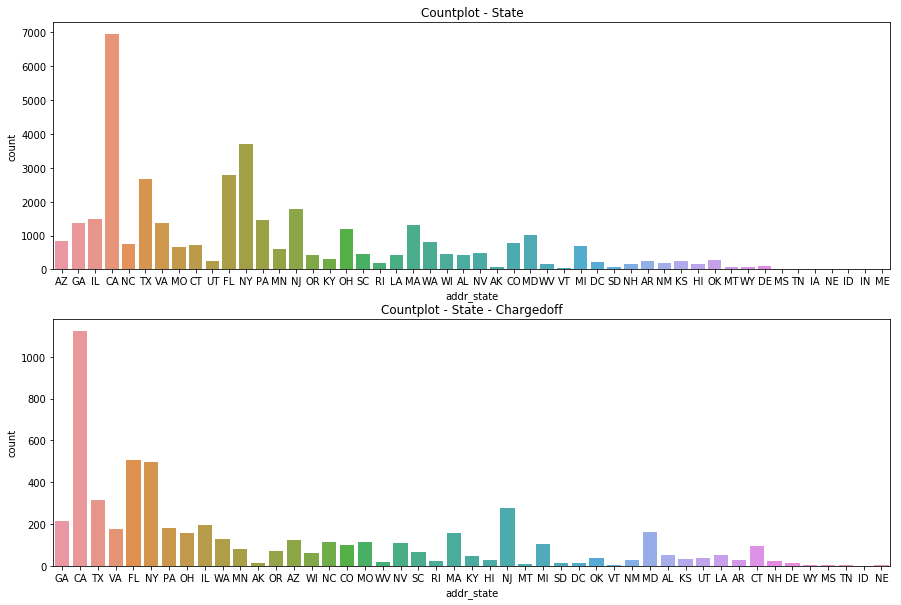

In [252]:
# Analysis of State

plt.figure(figsize=(15, 10))

# subplot 1
plt.subplot(2, 1, 1)
plt.title('Countplot - State')
sns.countplot(x="addr_state", data = loan)

# subplot 2
plt.subplot(2, 1, 2)
plt.title('Countplot - State - Chargedoff')
sns.countplot(x="addr_state", data = loanchargedoff)

# maximum charge off are from CA, FL and NY

In [253]:
#DTI
#A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
loan.dti.describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

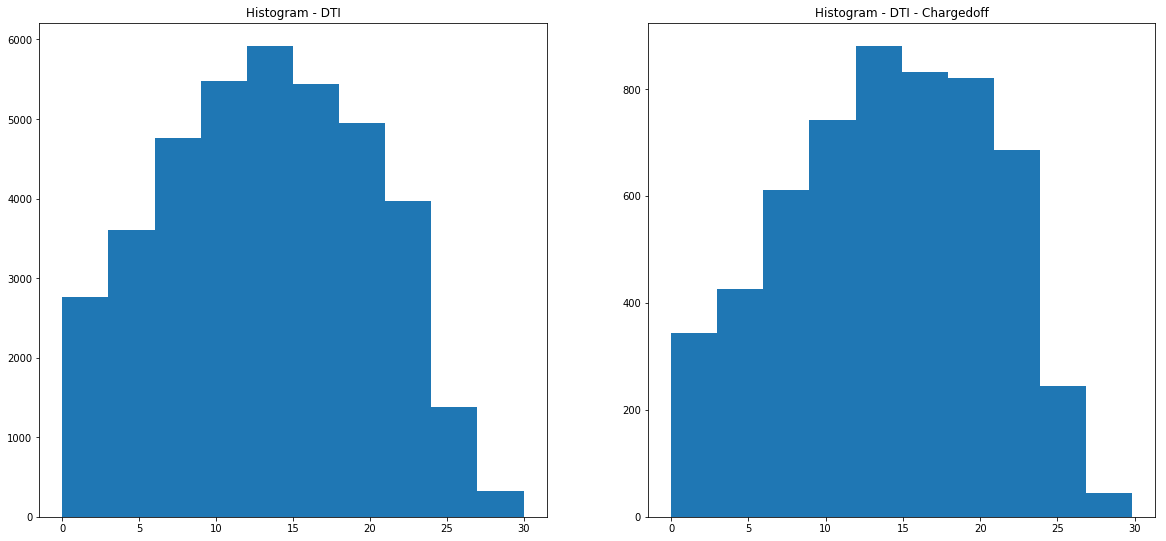

In [254]:
# using np.asarray to make histogram out of DTI which is in float datatype

plt.figure(figsize=(20, 20))
# subplot 1
plt.subplot(2, 2, 1)
plt.title('Histogram - DTI')
plt.hist(np.asarray(loan['dti'], dtype='float'))

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Histogram - DTI - Chargedoff')
plt.hist(np.asarray(loanchargedoff['dti'], dtype='float'))



plt.show()

# Charge off is very high with DTI 12.5% -22.5%

In [255]:

#Installment

loan['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

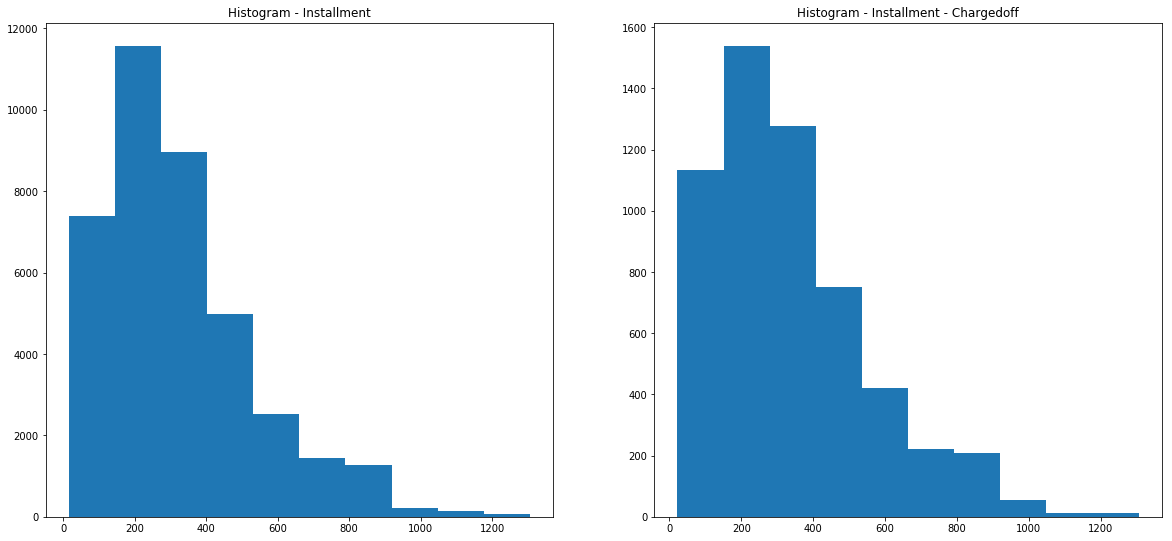

In [256]:
# using np.asarray to make histogram out of Installment which is in float datatype

plt.figure(figsize=(20, 20))
# subplot 1
plt.subplot(2, 2, 1)
plt.title('Histogram - Installment')
plt.hist(np.asarray(loan['installment'], dtype='float'))

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Histogram - Installment - Chargedoff')
plt.hist(np.asarray(loanchargedoff['installment'], dtype='float'))



plt.show()

# Charge off is highest when installment is between $200 - $400

In [257]:
# let's also observe the distribution of loans across years
# lets convert the year column into datetime and then extract year and month from it
loan['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [258]:
from datetime import datetime
loan['issue_d'] = loan['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))


In [259]:
# extracting month and year from issue_date
loan['month'] = loan['issue_d'].apply(lambda x: x.month)
loan['year'] = loan['issue_d'].apply(lambda x: x.year)

In [260]:
# number of loans across months
loan.groupby('month').month.count()

month
1     2379
2     2358
3     2691
4     2831
5     2919
6     3180
7     3351
8     3388
9     3498
10    3761
11    4006
12    4215
Name: month, dtype: int64

In [261]:
# dataframe with charged off loans
loanchargedoff = pd.DataFrame(loan[loan['loan_status'] == "Charged Off"])

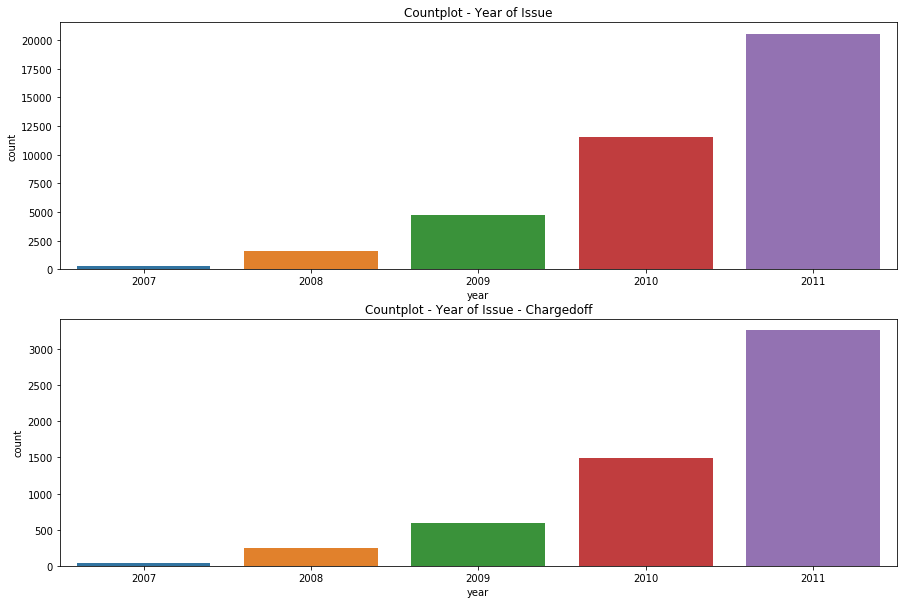

In [262]:
# Analysis of Date

plt.figure(figsize=(15, 10))

# subplot 1
plt.subplot(2, 1, 1)
plt.title('Countplot - Year of Issue')
sns.countplot(x="year", data = loan)

# subplot 2
plt.subplot(2, 1, 2)
plt.title('Countplot - Year of Issue - Chargedoff')
sns.countplot(x="year", data = loanchargedoff)

# maximum loans issued in 2011

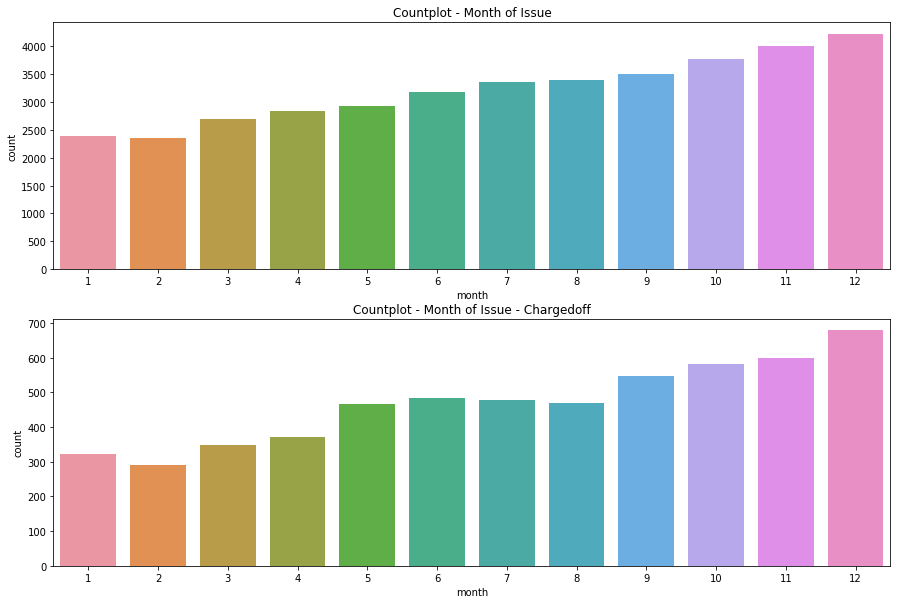

In [263]:
# Analysis of Month

plt.figure(figsize=(15, 10))

# subplot 1
plt.subplot(2, 1, 1)
plt.title('Countplot - Month of Issue')
sns.countplot(x="month", data = loan)

# subplot 2
plt.subplot(2, 1, 2)
plt.title('Countplot - Month of Issue - Chargedoff')
sns.countplot(x="month", data = loanchargedoff)

# The trend of loan issue and being charged off (for loan issued in respetive months) is similar

In [264]:
#pub_rec
#Number of derogatory public records
loan.pub_rec.value_counts()

0    36507
1     2013
2       48
3        7
4        2
Name: pub_rec, dtype: int64

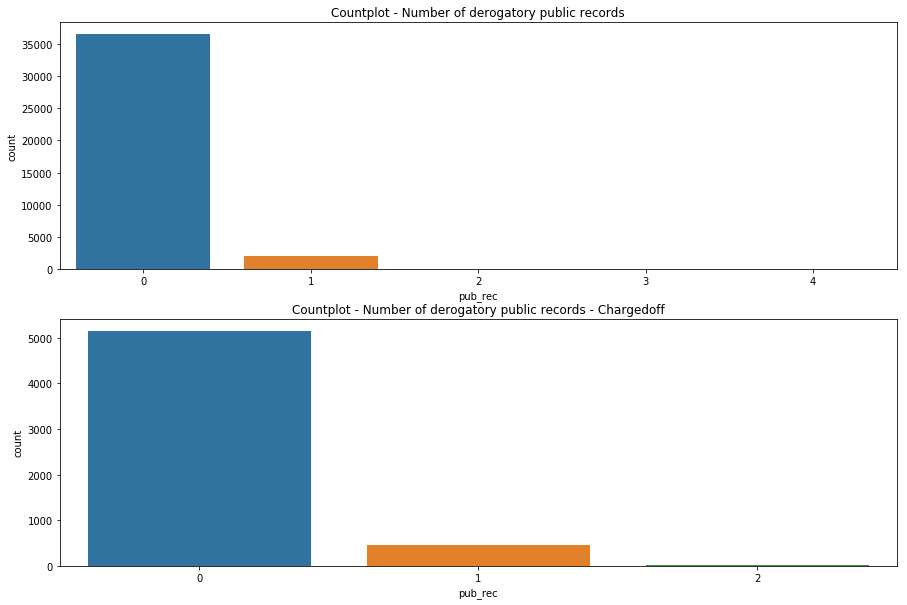

In [265]:
plt.figure(figsize=(15, 10))

# subplot 1
plt.subplot(2, 1, 1)
plt.title('Countplot - Number of derogatory public records')
sns.countplot(x="pub_rec", data = loan)

# subplot 2
plt.subplot(2, 1, 2)
plt.title('Countplot - Number of derogatory public records - Chargedoff')
sns.countplot(x="pub_rec", data = loanchargedoff)

In [266]:
# since most of values are 'Nil' can be deleted

loan.drop('pub_rec',axis=1,inplace=True)

In [267]:
#pub_rec_bankruptcies
# Number of public record bankruptcies
loan.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

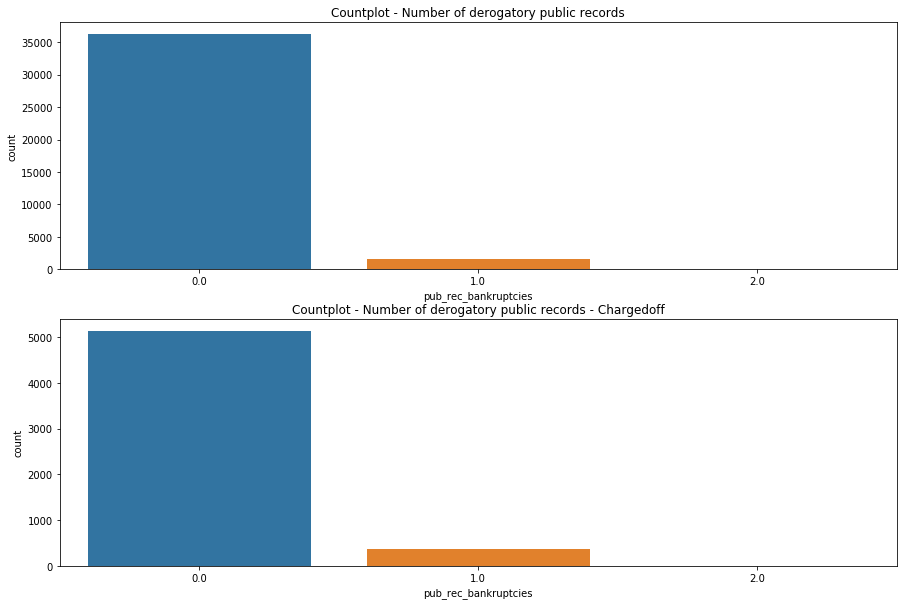

In [268]:
plt.figure(figsize=(15, 10))

# subplot 1
plt.subplot(2, 1, 1)
plt.title('Countplot - Number of derogatory public records')
sns.countplot(x="pub_rec_bankruptcies", data = loan)

# subplot 2
plt.subplot(2, 1, 2)
plt.title('Countplot - Number of derogatory public records - Chargedoff')
sns.countplot(x="pub_rec_bankruptcies", data = loanchargedoff)

In [269]:
# since most of values are 'Nil' can be deleted

loan.drop('pub_rec_bankruptcies',axis=1,inplace=True)

In [270]:
#open_acc
#The number of open credit lines in the borrower's credit file.

loan.open_acc.value_counts()

7     3909
6     3846
8     3814
9     3607
5     3111
10    3097
11    2666
4     2300
12    2198
13    1855
3     1470
14    1427
15    1146
16     908
17     716
2      596
18     516
19     384
20     281
21     235
22     137
23      93
24      75
25      53
26      34
28      24
27      22
30      15
29      13
31       7
34       5
35       4
33       3
32       3
36       2
38       1
39       1
41       1
42       1
44       1
Name: open_acc, dtype: int64

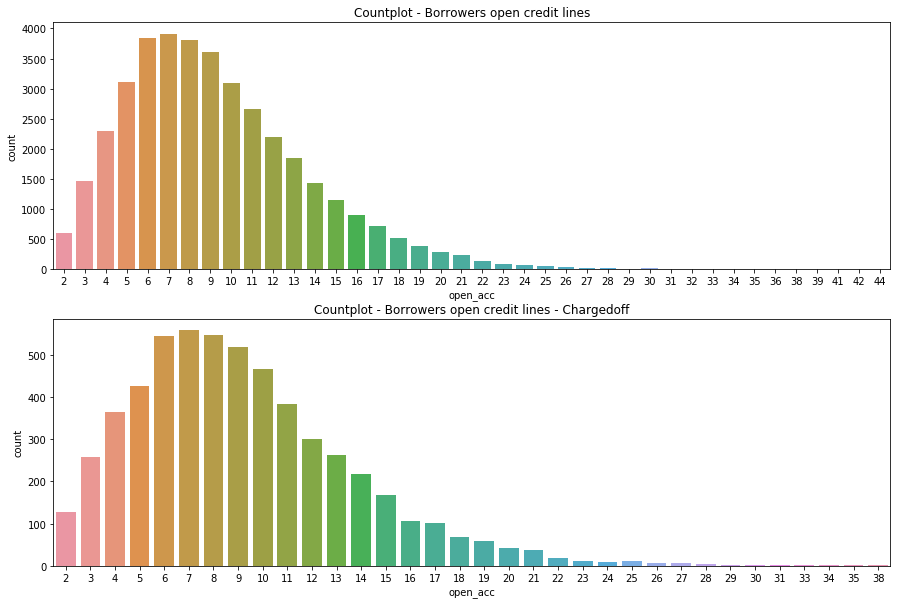

In [271]:
plt.figure(figsize=(15, 10))

# subplot 1
plt.subplot(2, 1, 1)
plt.title('Countplot - Borrowers open credit lines')
sns.countplot(x="open_acc", data = loan)

# subplot 2
plt.subplot(2, 1, 2)
plt.title('Countplot - Borrowers open credit lines - Chargedoff')
sns.countplot(x="open_acc", data = loanchargedoff)

In [272]:
# Not much to differeniate between Charged and total, hence dropped

loan.drop('open_acc',axis=1,inplace=True)

In [273]:
#out_prncp
#The number of open credit lines in the borrower's credit file.

loan.out_prncp.value_counts()

0.0    38577
Name: out_prncp, dtype: int64

In [274]:
# All Zero hence dropped

loan.drop('out_prncp',axis=1,inplace=True)

In [275]:
#out_prncp_inv
#Remaining outstanding principal for portion of total amount funded by investors

loan.out_prncp_inv.value_counts()

0.0    38577
Name: out_prncp_inv, dtype: int64

In [276]:
# All Zero hence dropped

loan.drop('out_prncp_inv',axis=1,inplace=True)

In [277]:
loan.recoveries.value_counts()

0.00       34359
10.40          4
11.29          4
19.20          3
13.59          3
11.20          3
10.66          3
13.93          3
13.44          3
44.92          3
16.27          3
9.80           3
16.50          3
14.61          3
10.13          3
10.07          3
12.09          3
13.00          3
164.81         3
101.39         2
10.86          2
139.62         2
84.55          2
87.36          2
12.41          2
13.16          2
182.90         2
44.09          2
13.47          2
11.58          2
           ...  
1898.32        1
271.02         1
2563.40        1
68.63          1
171.78         1
556.88         1
1517.32        1
17.24          1
249.61         1
294.11         1
225.59         1
11.25          1
109.25         1
71.41          1
321.76         1
1573.14        1
1040.81        1
4007.50        1
1007.13        1
318.99         1
613.69         1
166.71         1
20.41          1
151.51         1
1753.49        1
240.15         1
385.70         1
995.74        

In [278]:
# Most Zero hence dropped and balance not useful to solve the business problem

loan.drop('recoveries',axis=1,inplace=True)

In [279]:
#revol_bal
#Total credit revolving balance

loan.revol_bal.value_counts()

0         972
255        14
298        14
1          12
682        11
39          9
52          9
1763        9
865         9
346         9
6           9
2725        8
1815        8
798         8
3808        8
5           8
3612        8
3667        8
5626        8
1159        8
9           8
2639        8
13368       8
4941        8
10          8
1284        8
400         8
554         8
23          8
306         8
         ... 
100796      1
20433       1
24531       1
2008        1
71642       1
2572        1
525         1
6670        1
557         1
25185       1
37471       1
35420       1
6734        1
28533       1
10824       1
16255       1
18320       1
22418       1
24467       1
6042        1
12843       1
26516       1
28565       1
21031       1
16933       1
29219       1
25121       1
27168       1
33309       1
2257        1
Name: revol_bal, Length: 21275, dtype: int64

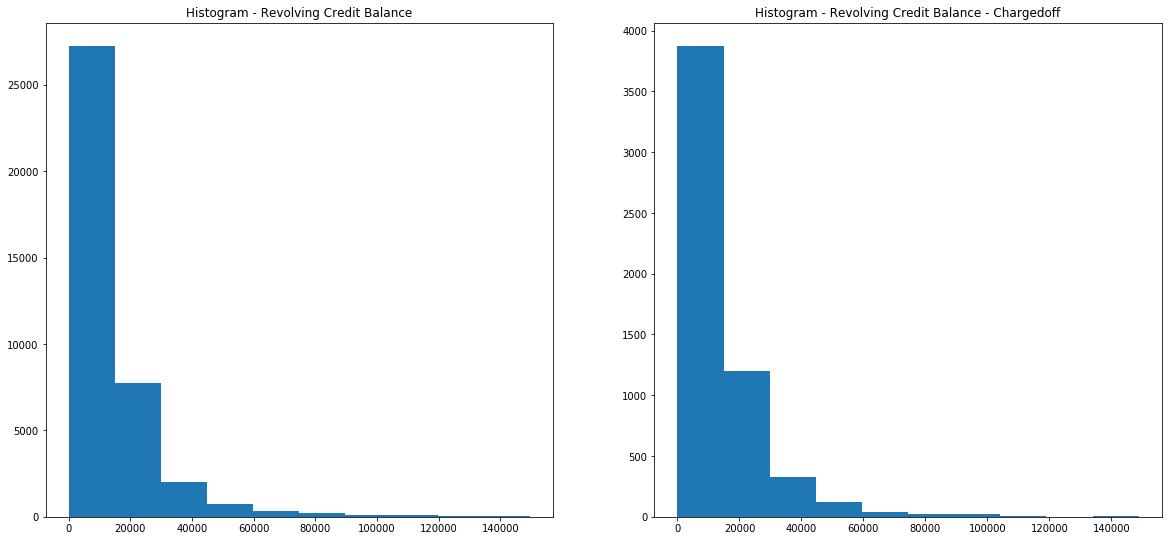

In [280]:
# using np.asarray to make histogram out of Revolving Credit Balancewhich is in float datatype

plt.figure(figsize=(20, 20))
# subplot 1
plt.subplot(2, 2, 1)
plt.title('Histogram - Revolving Credit Balance')
plt.hist(np.asarray(loan['revol_bal'], dtype='float'))

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Histogram - Revolving Credit Balance - Chargedoff')
plt.hist(np.asarray(loanchargedoff['revol_bal'], dtype='float'))



plt.show()

# There is not much difference between all loans and charged off hence proposed to be dropped

In [281]:
# Most Zero hence dropped and balance not useful to solve the business problem

loan.drop('revol_bal',axis=1,inplace=True)

In [282]:
#revol_util

#Revolving line utilization rate, or the amount of credit the borrower 
#is using relative to all available revolving credit.

loan['revol_util'].describe()

count     38527
unique     1088
top          0%
freq        954
Name: revol_util, dtype: object

In [283]:
# not useful for analysis

In [284]:
#total_acc

#The total number of credit lines currently in the borrower's credit file

loan['total_acc'].describe()

count    38577.000000
mean        22.052648
std         11.425861
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

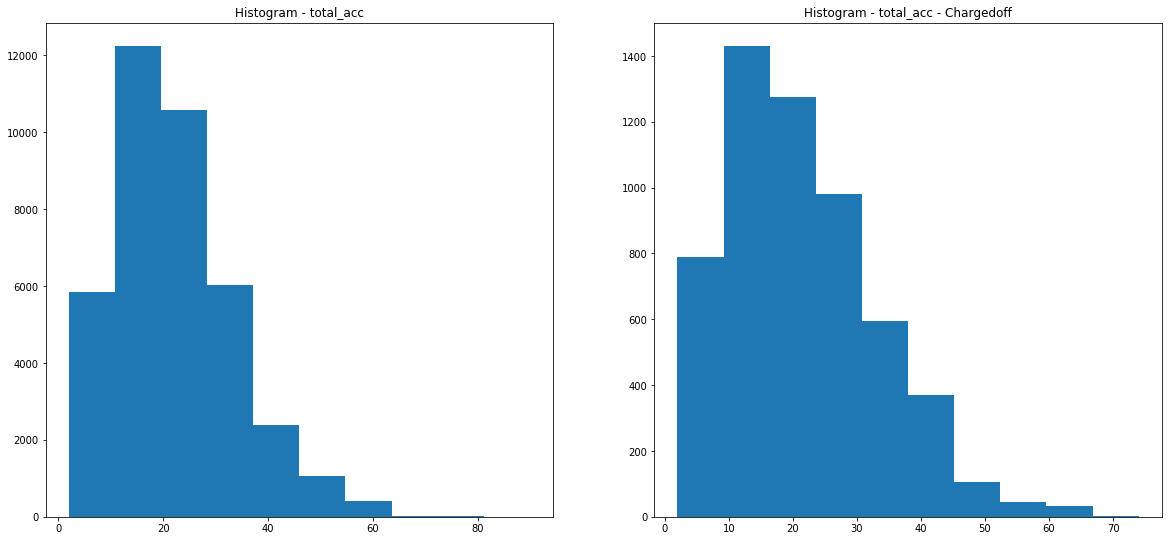

In [285]:
# using np.asarray to make histogram out of total_acc 

plt.figure(figsize=(20, 20))
# subplot 1
plt.subplot(2, 2, 1)
plt.title('Histogram - total_acc')
plt.hist(np.asarray(loan['total_acc'], dtype='float'))

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Histogram - total_acc - Chargedoff')
plt.hist(np.asarray(loanchargedoff['total_acc'], dtype='float'))



plt.show()

# There is not much difference between all loans and charged off hence proposed to be dropped

In [286]:
# Most Zero hence dropped and balance not useful to solve the business problem

loan.drop('total_acc',axis=1,inplace=True)

In [287]:
#total_pymnt
#Payments received to date for total amount funded
loan.total_pymnt.describe()

count    38577.000000
mean     11866.970365
std       8809.856227
min          0.000000
25%       5513.497338
50%       9674.048405
75%      16136.952430
max      58563.679930
Name: total_pymnt, dtype: float64

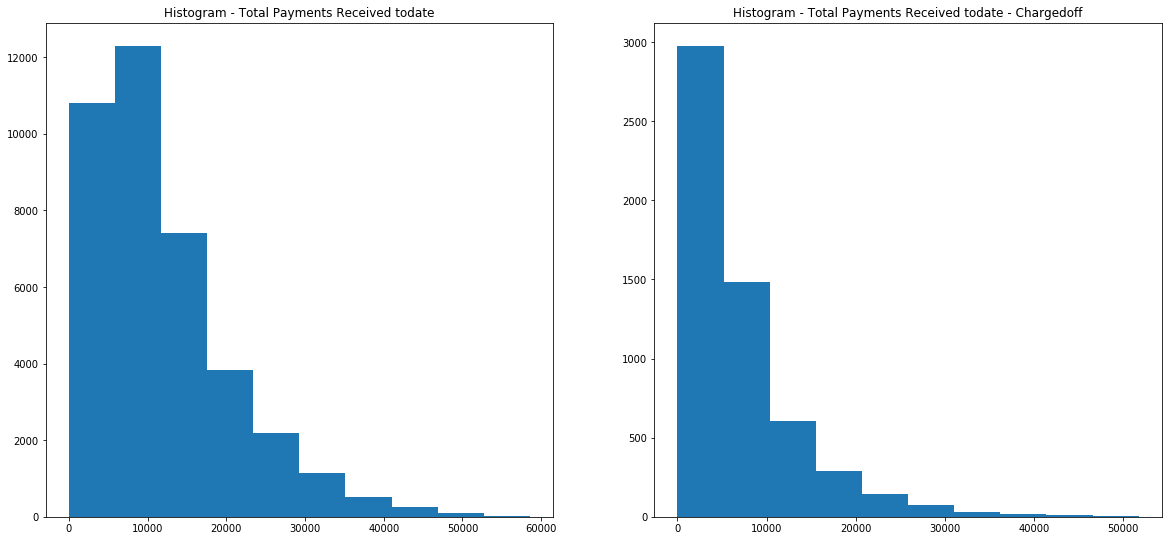

In [288]:
# using np.asarray to make histogram out of Total Payments received to date 

plt.figure(figsize=(20, 20))
# subplot 1
plt.subplot(2, 2, 1)
plt.title('Histogram - Total Payments Received todate')
plt.hist(np.asarray(loan['total_pymnt'], dtype='float'))

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Histogram - Total Payments Received todate - Chargedoff')
plt.hist(np.asarray(loanchargedoff['total_pymnt'], dtype='float'))



plt.show()
#maximum chargeoff is where total payments received is less than $5000

In [289]:
#total_pymnt_inv
#Payments received to date for portion of total amount funded by investors
loan.total_pymnt_inv.describe()

count    38577.000000
mean     11271.196153
std       8700.845592
min          0.000000
25%       5019.590000
50%       9066.660000
75%      15329.780000
max      58563.680000
Name: total_pymnt_inv, dtype: float64

In [290]:
# the statistics is no different from total_acc hence dropped
# Most Zero hence dropped and balance not useful to solve the business problem

loan.drop('total_pymnt_inv',axis=1,inplace=True)

In [291]:
#total_rec_int
loan.total_rec_int.describe()

count    38577.000000
mean      2119.243370
std       2389.499511
min          0.000000
25%        643.990000
50%       1300.450000
75%       2671.980000
max      23563.680000
Name: total_rec_int, dtype: float64

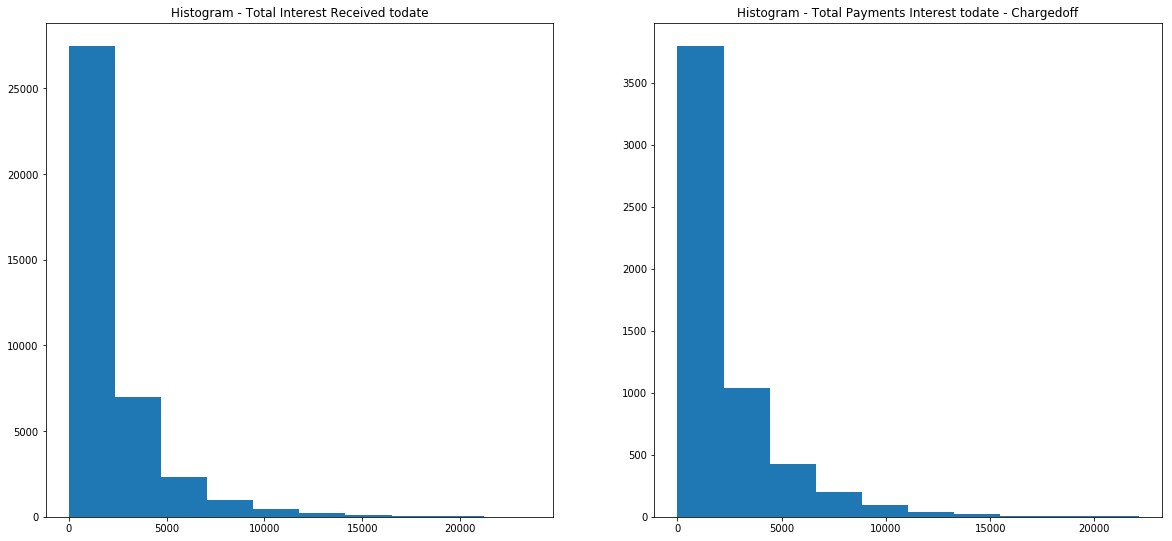

In [292]:
# using np.asarray to make histogram out of Total Interest received to date 

plt.figure(figsize=(20, 20))
# subplot 1
plt.subplot(2, 2, 1)
plt.title('Histogram - Total Interest Received todate')
plt.hist(np.asarray(loan['total_rec_int'], dtype='float'))

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Histogram - Total Payments Interest todate - Chargedoff')
plt.hist(np.asarray(loanchargedoff['total_rec_int'], dtype='float'))



plt.show()
# There is not much difference between all loans and charged off hence proposed to be dropped

In [293]:
loan.drop('total_rec_int',axis=1,inplace=True)

In [294]:
#total_rec_prncp
#Principal received to date
loan.total_rec_prncp.describe()


count    38577.000000
mean      9648.322898
std       7009.381200
min          0.000000
25%       4500.000000
50%       8000.000000
75%      13175.000000
max      35000.020000
Name: total_rec_prncp, dtype: float64

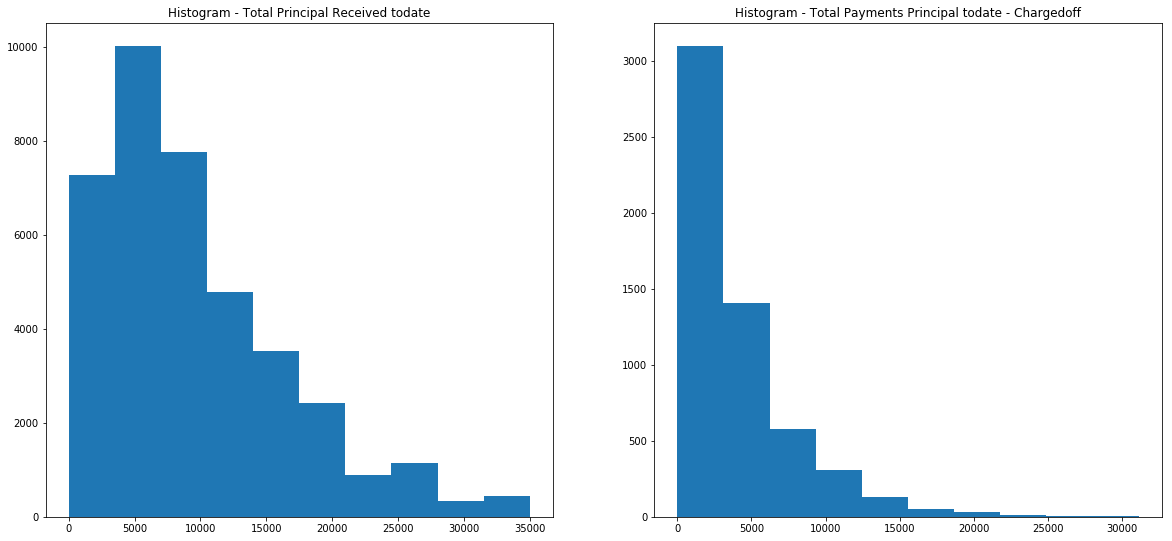

In [295]:
# using np.asarray to make histogram out of Total Principal received to date 

plt.figure(figsize=(20, 20))
# subplot 1
plt.subplot(2, 2, 1)
plt.title('Histogram - Total Principal Received todate')
plt.hist(np.asarray(loan['total_rec_prncp'], dtype='float'))

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Histogram - Total Payments Principal todate - Chargedoff')
plt.hist(np.asarray(loanchargedoff['total_rec_prncp'], dtype='float'))



plt.show()

# Cases where $0-$2500 received has more charge off and substaintial principle payment has lower charge off

In [296]:
#verification_status
#Indicates if income was verified by LC, not verified, or if the income source was verified
loan.verification_status.describe()

count            38577
unique               3
top       Not Verified
freq             16694
Name: verification_status, dtype: object

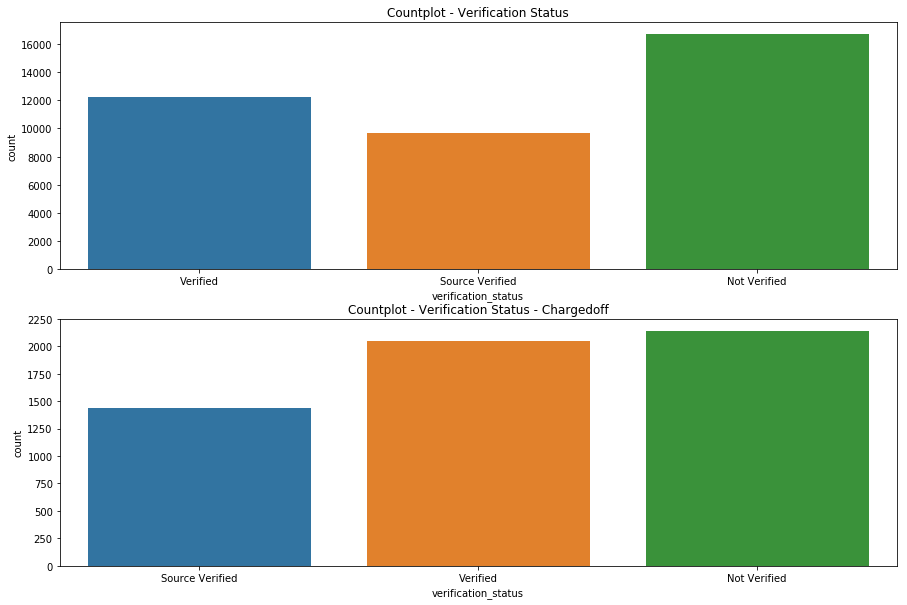

In [297]:
plt.figure(figsize=(15, 10))

# subplot 1
plt.subplot(2, 1, 1)
plt.title('Countplot - Verification Status')
sns.countplot(x="verification_status", data = loan)

# subplot 2
plt.subplot(2, 1, 2)
plt.title('Countplot - Verification Status - Chargedoff')
sns.countplot(x="verification_status", data = loanchargedoff)

In [298]:
# Charge off is low where source is verified nd high where not verified

In [299]:
#title
#The loan title provided by the borrower
loan.title.value_counts()

Debt Consolidation                                              2090
Debt Consolidation Loan                                         1620
Personal Loan                                                    641
Consolidation                                                    491
debt consolidation                                               478
Credit Card Consolidation                                        348
Home Improvement                                                 345
Debt consolidation                                               322
Small Business Loan                                              305
Credit Card Loan                                                 301
Personal                                                         301
Consolidation Loan                                               248
Home Improvement Loan                                            230
personal loan                                                    227
personal                          

In [300]:
# converting all to upper case
loan.title = loan.title.str.upper() 

In [301]:
loan.title.value_counts()

DEBT CONSOLIDATION                                                                2948
DEBT CONSOLIDATION LOAN                                                           1752
PERSONAL LOAN                                                                      958
CONSOLIDATION                                                                      699
HOME IMPROVEMENT                                                                   526
PERSONAL                                                                           524
CREDIT CARD CONSOLIDATION                                                          474
CREDIT CARD LOAN                                                                   341
CONSOLIDATION LOAN                                                                 335
SMALL BUSINESS LOAN                                                                327
LOAN                                                                               303
HOME IMPROVEMENT LOAN                      

In [302]:
# removing "Loan" word
loan.title=loan.title.replace({" LOAN": ""},regex=True)
#loan.title=loan.title.replace({" CONSOLIDATION": ""},regex=True)
#loan.title=loan.title.replace({" CARDS": " CARD"},regex=True)


In [303]:
# dropping 
loan.drop('title',axis=1,inplace=True)

In [304]:
# dataframe with charged off loans
loanchargedoff = pd.DataFrame(loan[loan['loan_status'] == "Charged Off"])

In [305]:


# however the Company has analysed this and given the codes, hence we prefer to rely on company data
# rather than borrower data

In [306]:
#inq_last_6mths
#The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
loan.inq_last_6mths.describe()

count    38577.000000
mean         0.871737
std          1.071546
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

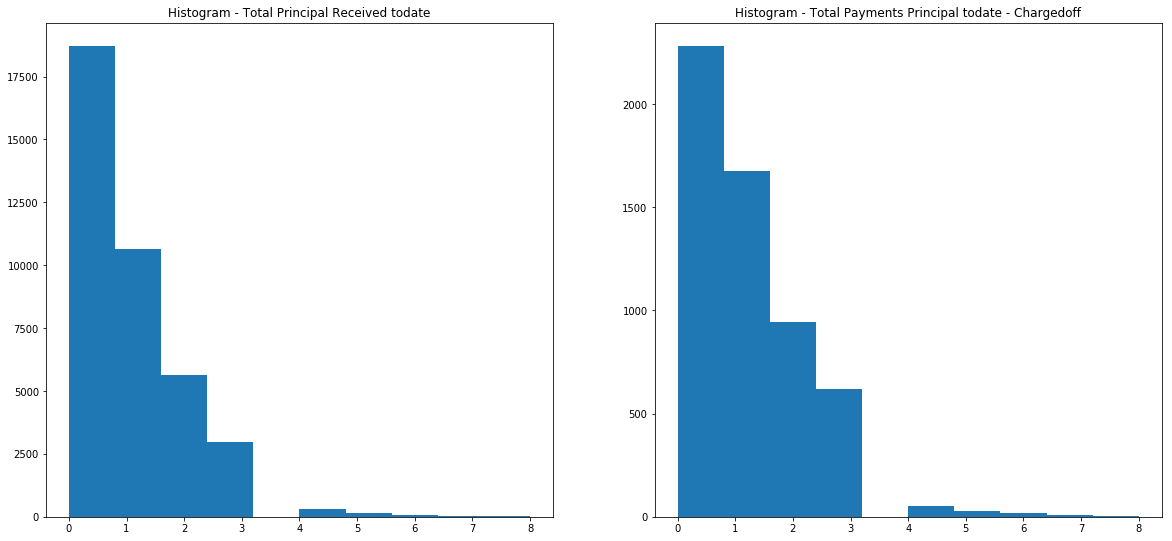

In [307]:
# using np.asarray to make histogram out of Total Principal received to date 

plt.figure(figsize=(20, 20))
# subplot 1
plt.subplot(2, 2, 1)
plt.title('Histogram - Total Principal Received todate')
plt.hist(np.asarray(loan['inq_last_6mths'], dtype='float'))

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Histogram - Total Payments Principal todate - Chargedoff')
plt.hist(np.asarray(loanchargedoff['inq_last_6mths'], dtype='float'))



plt.show()

# There is not much change in the data compared to total and charged off, hence dropping

In [308]:
# dropping 
loan.drop('inq_last_6mths',axis=1,inplace=True)

In [309]:
#last_credit_pull_d

loan['last_credit_pull_d'].head()

0    May-16
1    Sep-13
2    May-16
3    Apr-16
5    Jan-16
Name: last_credit_pull_d, dtype: object

In [310]:


# This data is not relevant for addressing the business problem hence not analysied further

In [311]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 30 columns):
id                     38577 non-null int64
loan_amnt              38577 non-null int64
term                   38577 non-null object
int_rate               38577 non-null float64
installment            38577 non-null float64
grade                  38577 non-null object
sub_grade              38577 non-null object
emp_title              36191 non-null object
emp_length             37544 non-null object
home_ownership         38577 non-null object
annual_inc             38577 non-null float64
verification_status    38577 non-null object
issue_d                38577 non-null datetime64[ns]
loan_status            38577 non-null category
purpose                38577 non-null object
zip_code               38577 non-null object
addr_state             38577 non-null object
dti                    38577 non-null float64
delinq_2yrs            38577 non-null int64
earliest_cr_line       38

In [312]:
#delinq_2yrs 
#The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

loan.delinq_2yrs.describe()

count    38577.000000
mean         0.146668
std          0.492271
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: delinq_2yrs, dtype: float64

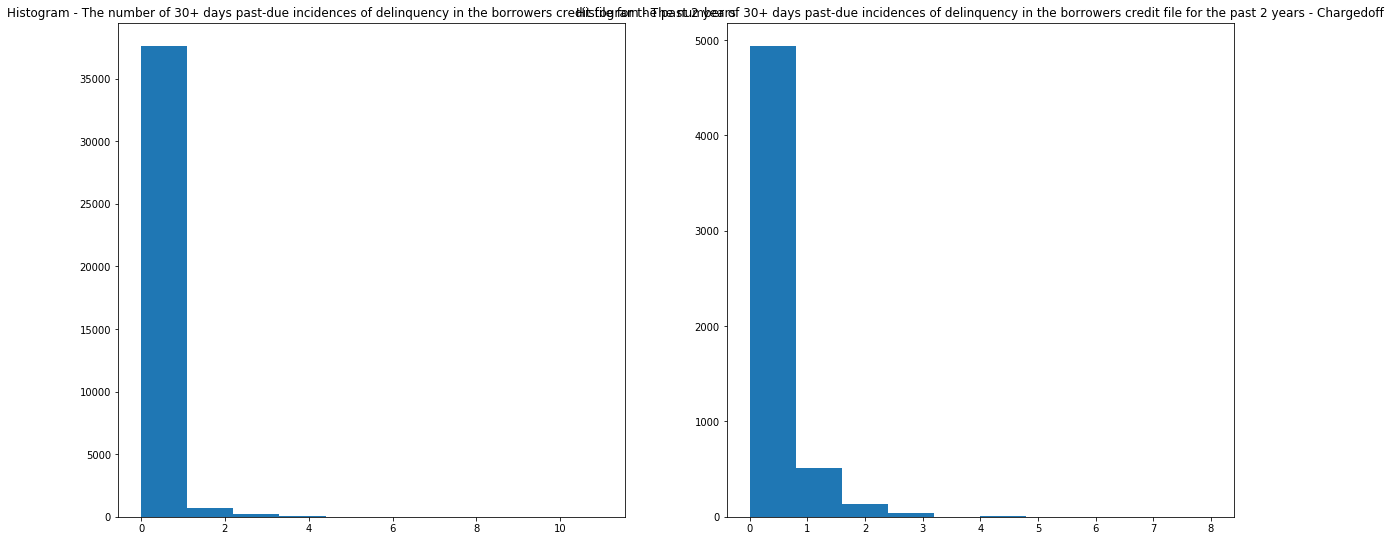

In [313]:
# The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years - Histogram

plt.figure(figsize=(20, 20))
# subplot 1
plt.subplot(2, 2, 1)
plt.title('Histogram - The number of 30+ days past-due incidences of delinquency in the borrowers credit file for the past 2 years')
plt.hist(np.asarray(loan['delinq_2yrs'], dtype='float'))

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Histogram - The number of 30+ days past-due incidences of delinquency in the borrowers credit file for the past 2 years - Chargedoff')
plt.hist(np.asarray(loanchargedoff['delinq_2yrs'], dtype='float'))



plt.show()

# IF there has been 1 or more past due incidences the chances are of charge off


In [314]:
loan.total_rec_late_fee.describe()

count    38577.000000
mean         1.368634
std          7.315880
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64

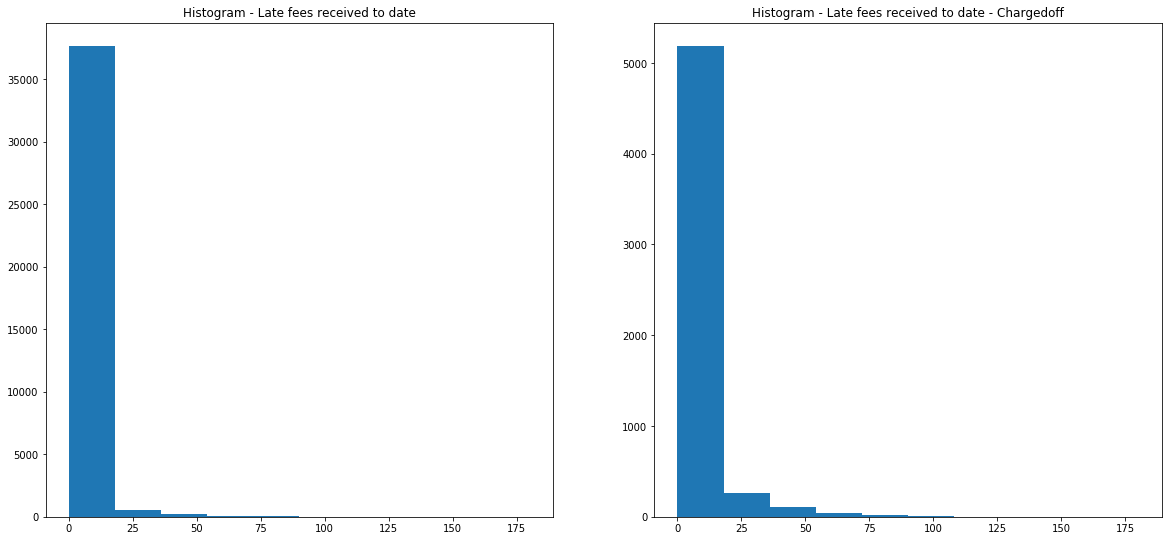

In [315]:
# Late fees received to date - Histogram

plt.figure(figsize=(20, 20))
# subplot 1
plt.subplot(2, 2, 1)
plt.title('Histogram - Late fees received to date')
plt.hist(np.asarray(loan['total_rec_late_fee'], dtype='float'))

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Histogram - Late fees received to date - Chargedoff')
plt.hist(np.asarray(loanchargedoff['total_rec_late_fee'], dtype='float'))



plt.show()

# Not much difference in charge off and others for late fee received. Also since we are analysing charge off
# recovery is expected only for charge off, hence dropped


In [316]:
# dropping 
loan.drop('total_rec_late_fee',axis=1,inplace=True)

In [317]:
# dataframe with charged off loans
loanchargedoff = pd.DataFrame(loan[loan['loan_status'] == "Charged Off"])

In [318]:
#purpose
#A category provided by the borrower for the loan request. 
loan.purpose.describe()

count                  38577
unique                    14
top       debt_consolidation
freq                   18055
Name: purpose, dtype: object

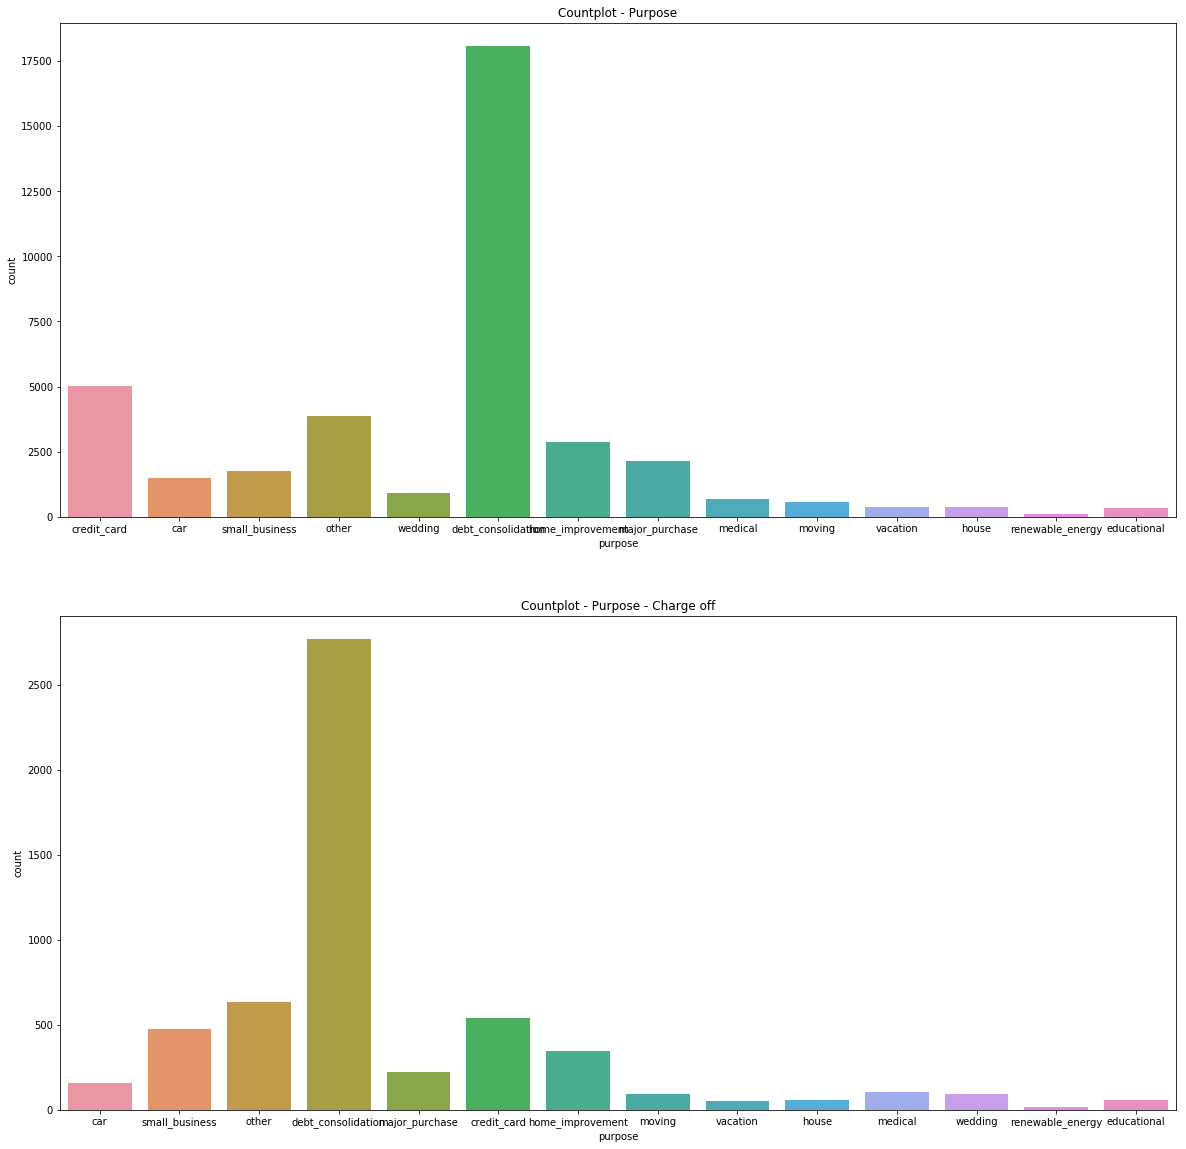

In [319]:
plt.figure(figsize=(20, 20))
# subplot 1
plt.subplot(2, 1, 1)
plt.title('Countplot - Purpose')
sns.countplot(x="purpose", data = loan)

# subplot 1
plt.subplot(2, 1, 2)
plt.title('Countplot - Purpose - Charge off')
sns.countplot(x="purpose", data = loanchargedoff)

In [320]:
# Debt Consolidation, Credit Cards and Others are main loans being charged off